In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
sns.set(style="white", context='poster')
from sympy import *
import math
init_printing(use_unicode=True)
from scipy.integrate import solve_ivp

levenberg optimization

In [2]:
%load_ext autoreload
%autoreload 2


In [3]:
#from model_equations_separate_NC import *
from model_equations_separate_NC_sep_vmax import *


In [4]:

HCOLOR = '#ffc58f'
HCOLOR_light = '#ffd2a9'
PCOLOR = '#99cc99'
PCOLOR_light = '#aad5aa'

DONCOLOR = '#7285b7'
RDONCOLOR = 'black' #'#00334D'
DINCOLOR = '#bbdaff' #'#000066'

DOCCOLOR = '#cc6666'
RDOCCOLOR = 'black' #'#00334D'
DICCOLOR = '#ff9da4' #'#000066'

SHCOLOR = '#ffa98f'
SPCOLOR = '#326232'


ccnpalette = [PCOLOR, HCOLOR, SPCOLOR, SHCOLOR,DONCOLOR, RDONCOLOR, DINCOLOR]
ccnorder = ['Bp', 'Bh', 'ABp', 'ABh', 'DON', 'RDON', 'DIN', ]
cccpalette = [PCOLOR, HCOLOR, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
cccorder = ['Bp[C]', 'Bh[C]', 'ABp[C]', 'ABh[C]', 'DOC', 'RDOC', 'DIC']
ccxpalette = [PCOLOR, HCOLOR]
ccxorder = ['Xp', 'Xh']
hnpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
hnorder = [ 'Bh', 'ABp', 'ABh', 'DON', 'RDON', 'DIN']
hcpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
hcorder = [ 'Bh[C]', 'ABp[C]', 'ABh[C]', 'DOC', 'RDOC', 'DIC']
pnpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
pnorder = [ 'Bp', 'ABp', 'ABh', 'DON', 'RDON', 'DIN']
pcpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
pcorder = [ 'Bp[C]', 'ABp[C]', 'ABh[C]', 'DOC', 'RDOC', 'DIC']
sns.color_palette(ccnpalette + cccpalette, )
# 


In [5]:

 
sns.color_palette([PCOLOR, HCOLOR, PCOLOR_light, HCOLOR_light] )


In [6]:
refdf = pd.read_csv('prelim_bottle.csv')


In [7]:
refdf.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'day', '1A3', 'cc 1A3', 'cc mit9312',
       'mit9312', 'cc Bh[N]', 'Bh[N]', 'cc Bp[N]', 'Bp[N]', 'cc Bh[C]',
       'Bh[C]', 'cc Bp[C]', 'Bp[C]', 't'],
      dtype='object')

In [8]:
print_params()

M_h  = 1.16e-06, 1.00e-01
M_p  = 1.16e-06, 1.00e-01
gamma^D_p  = 6.00e-01, 5.18e+04
gamma^D_h  = 6.00e-01, 5.18e+04
R_p  = 7.00e+00, 6.05e+05
R_h  = 4.50e+00, 3.89e+05
E^O_p  = 1.16e-06, 1.00e-01
E^I_p  = 0.00e+00, 0.00e+00
E^O_h  = 1.16e-06, 1.00e-01
E^I_h  = 0.00e+00, 0.00e+00
K^ON_p  = 1.43e-01, 1.23e+04
K^IN_p  = 1.43e-01, 1.23e+04
K^OC_p  = 1.43e-01, 1.23e+04
K^IC_p  = 1.43e-01, 1.23e+04
K^ON_h  = 2.50e-01, 2.16e+04
K^IN_h  = 2.50e-01, 2.16e+04
K^OC_h  = 2.50e-01, 2.16e+04
K^IC_h  = 2.50e-01, 2.16e+04
Vmax^ON_p  = 0.00e+00, 0.00e+00
Vmax^IN_p  = 8.10e-06, 7.00e-01
Vmax^OC_p  = 0.00e+00, 0.00e+00
Vmax^IC_p  = 5.67e-05, 4.90e+00
Vmax^ON_h  = 1.50e-05, 1.30e+00
Vmax^IN_h  = 1.50e-05, 1.30e+00
Vmax^OC_h  = 6.77e-05, 5.85e+00
Vmax^IC_h  = 0.00e+00, 0.00e+00
E^ROS_p  = 6.48e-07, 5.60e-02
E^ROS_h  = 4.05e-07, 3.50e-02
VROSmax  = 7.70e-06, 6.65e-01
KROS_h  = 2.50e-01, 2.16e+04
omega_p  = 1.00e-02, 8.64e+02
omega_h  = 1.00e-05, 8.64e-01
ROS_decay  = 1.00e-02, 8.64e+02
K^AB_p  = 1.43e+01, 1

In [9]:
len(param_vals)

In [10]:
pro_vol, alt_vol, pro_vol**0.67, alt_vol**0.67, Qp, Qh

In [11]:
Qh * 14 * 1e9, Qp * 14 * 1e9, 

dBp/dt


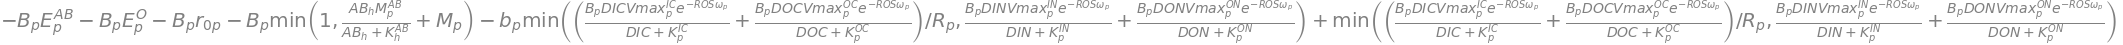

dBh/dt


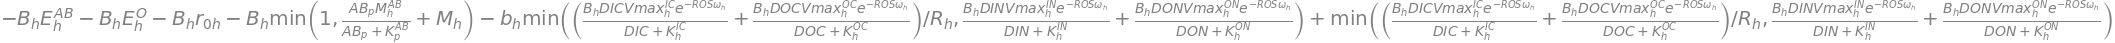

dDON/dt


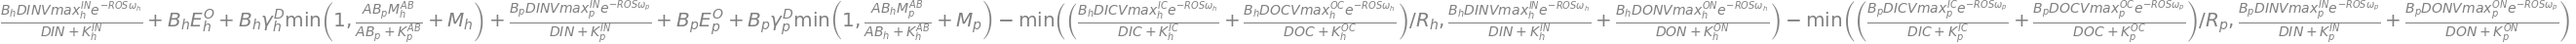

dRDON/dt


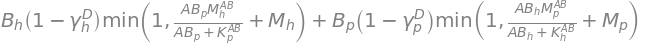

dDIN/dt


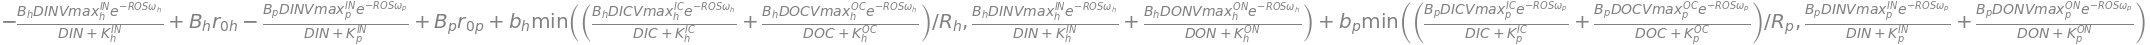

dDOC/dt


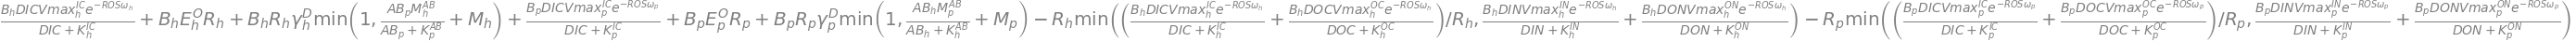

dRDOC/dt


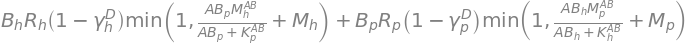

dDIC/dt


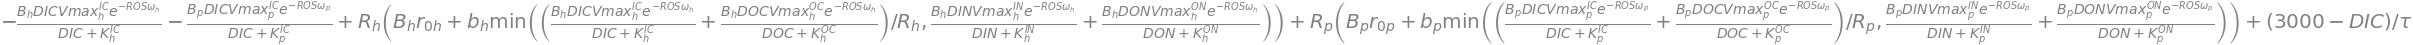

dROS/dt


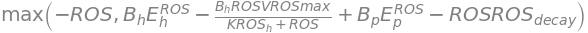

dABp/dt


dABh/dt


In [12]:
print_equations()


In [13]:
var_names, init_vars, calc_dydt, interm_names, intermediate_func = get_main_data()

In [14]:
print_dydt0(calc_dydt, var_names, init_vars)


dBp/dt = 6.42e-06, init Bp = 1.79e+00, newval = 1.79e+00
dBh/dt = 1.50e-04, init Bh = 1.43e+01, newval = 1.43e+01
dDON/dt = 2.96e-05, init DON = 2.00e+01, newval = 2.00e+01
dRDON/dt = 7.44e-06, init RDON = 0.00e+00, newval = 7.44e-06
dDIN/dt = -1.93e-04, init DIN = 1.00e+02, newval = 1.00e+02
dDOC/dt = -8.23e-04, init DOC = 1.32e+02, newval = 1.32e+02
dRDOC/dt = 3.55e-05, init RDOC = 0.00e+00, newval = 3.55e-05
dDIC/dt = 6.96e-05, init DIC = 3.00e+03, newval = 3.00e+03
dROS/dt = -2.04e-03, init ROS = 2.00e-01, newval = 1.98e-01
dABp/dt = -0.00e+00, init ABp = 0.00e+00, newval = 0.00e+00
dABh/dt = -0.00e+00, init ABh = 0.00e+00, newval = 0.00e+00


In [15]:
print_intermediate0(intermediate_func, interm_names, init_vars)


Xp   = 1.00e+09
Xh   = 5.00e+09
limINp = 9.99e-01
limONp = 9.93e-01
limICp = 1.00e+00
limOCp = 9.99e-01
limINh = 9.98e-01
limONh = 9.88e-01
limICh = 1.00e+00
limOCh = 9.98e-01
gross_uptakeINp = 1.44e-05
gross_uptakeONp = 0.00e+00
gross_uptakeICp = 1.01e-04
gross_uptakeOCp = 0.00e+00
gross_uptakeINh = 2.14e-04
gross_uptakeONh = 2.12e-04
gross_uptakeICh = 0.00e+00
gross_uptakeOCh = 9.65e-04
net_uptakeNp = 1.44e-05
net_uptakeNh = 2.15e-04
overflowNp = 0.00e+00
overflowCp = 1.39e-07
overflowNh = 2.12e-04
overflowCh = -6.51e-19
deathp = 2.07e-06
deathh = 1.65e-05
leakinessOp = 2.07e-06
leakinessIp = 0.00e+00
leakinessOh = 1.65e-05
leakinessIh = 0.00e+00
ROSreleasep = 1.16e-06
ROSbreakdownh = 4.88e-05
respirationp = 3.86e-06
respirationh = 3.19e-05
dic_air_water_exchange = -1.04e-16
limICp = 1.00e+00
exp(-omegaP*ROS) = 9.98e-01


In [16]:
biomass_diff0(calc_dydt, var_names,init_vars)


dBp/dt + dBh/dt + dDON/dt + dRDON/dt + dDIN/dt = -8.131516293641283e-20


In [17]:
1e10 * Qh

In [18]:
1e9 * Qp

In [19]:
pro_alt_vol_ratio, pro_vol, alt_vol

In [20]:
init_vars

In [21]:
get_t_eval(maxday=140, step = 3600*4, ref_times = refdf['t'])


array([       0.,    14400.,    28800.,    43200.,    57600.,    72000.,
          86400.,   100800.,   115200.,   129600.,   144000.,   157320.,
         158400.,   172800.,   187200.,   201600.,   216000.,   230400.,
         244800.,   259200.,   273600.,   288000.,   302400.,   316800.,
         331200.,   345600.,   360000.,   374400.,   388800.,   403200.,
         417540.,   417600.,   432000.,   446400.,   460800.,   475200.,
         489600.,   504000.,   518400.,   532800.,   547200.,   561600.,
         576000.,   590400.,   592140.,   604800.,   619200.,   633600.,
         648000.,   662400.,   676800.,   691200.,   705600.,   720000.,
         734400.,   748800.,   758520.,   763200.,   777600.,   792000.,
         806400.,   820800.,   835200.,   849600.,   864000.,   878400.,
         892800.,   907200.,   921600.,   936000.,   950400.,   964800.,
         979200.,   993600.,  1008000.,  1019820.,  1022400.,  1036800.,
        1051200.,  1065600.,  1080000.,  1094400., 

In [22]:
sol = run_solver(calc_dydt, init_vars, days=140, t_eval=get_t_eval(maxday=140, step = 3600*4, ref_times = refdf['t']))

simulation time 30.828125


In [23]:
df, mdf = solver2df(sol, var_names, interm_names, intermediate_func)

In [24]:
def _rmse(refdf, df, refcol, col):
    smallrefdf = refdf.dropna(subset=[refcol])
    ref_t = np.rint(smallrefdf['t'])
    tdf = df.loc[df.t.isin(ref_t)]
    return mean_squared_error(tdf[col], smallrefdf[refcol])
   

In [25]:
perr =  _rmse(refdf, df, refcol = 'cc Bp[N]', col='Bp')
herr =  _rmse(refdf, df, refcol = 'cc Bh[N]', col='Bh')
terr =  _rmse(refdf, df, refcol = 't', col='t')
terr, perr, herr, perr+herr


In [26]:
refdf

,Unnamed: 0.1,Unnamed: 0,day,1A3,cc 1A3,cc mit9312,mit9312,cc Bh[N],Bh[N],cc Bp[N],Bp[N],cc Bh[C],Bh[C],cc Bp[C],Bp[C],t
0,0,0,0.000000,9.297512e+09,4.698967e+09,7.178947e+08,1.032630e+09,10.069216,19.923240,0.307669,0.442556,45.311472,89.654581,2.153684,3.097889,0.000000e+00
1,1,1,1.820833,1.469212e+10,4.648133e+09,1.753684e+09,1.641075e+09,9.960286,31.483118,0.751579,0.703318,44.821287,141.674030,5.261053,4.923225,1.573200e+05
2,2,2,4.832639,6.030062e+09,2.996029e+09,9.823158e+09,2.853167e+09,6.420061,12.921562,4.209925,1.222786,28.890276,58.147028,29.469474,8.559501,4.175400e+05
3,3,3,6.853472,4.987215e+09,2.290707e+09,2.812842e+10,1.576008e+10,4.908658,10.686889,12.055038,6.754319,22.088959,48.091001,84.385263,47.280230,5.921400e+05
4,4,4,8.779167,2.867312e+09,1.598094e+09,6.262316e+10,4.113340e+10,3.424487,6.144239,26.838496,17.628599,15.410189,27.649077,187.869474,123.400192,7.585200e+05
5,5,5,11.803472,3.024879e+09,2.579825e+09,8.468000e+10,5.958541e+10,5.528197,6.481884,36.291429,25.536605,24.876886,29.168477,254.040000,178.756238,1.019820e+06
6,6,6,13.770833,3.148238e+09,3.183479e+09,7.397263e+10,6.059981e+10,6.821741,6.746224,31.702556,25.971346,30.697833,30.358007,221.917895,181.799424,1.189800e+06
7,7,7,15.774306,1.311956e+09,3.404289e+09,6.191263e+10,2.370537e+10,7.294905,2.811334,26.533985,10.159446,32.827074,12.651002,185.737895,71.116123,1.362900e+06
8,8,8,18.715278,8.641327e+08,5.151708e+09,5.131158e+10,1.071017e+09,11.039374,1.851713,21.990677,0.459007,49.677181,8.332708,153.934737,3.213052,1.617000e+06
9,9,9,20.777778,9.460263e+08,3.734710e+09,4.572316e+10,5.786948e+08,8.002950,2.027199,19.595639,0.248012,36.013276,9.122396,137.169474,1.736084,1.795200e+06


In [27]:
#df, mdf = solver2df(sol, var_names, interm_names, intermediate_func)

In [28]:
df.head()

,Bp,Bh,DON,RDON,DIN,DOC,RDOC,DIC,ROS,ABp,...,ROSreleasep,ROSbreakdownh,respirationp,respirationh,dic_air_water_exchange,exp(-omegaP*ROS),Bp[C],Bh[C],ABp[C],ABh[C]
0,1.785714,14.285714,20.000000,0.000000,100.000000,132.500000,0.000000,3000.000000,0.200000,0.0,...,0.000001,4.883876e-05,0.000004,0.000032,-1.040834e-16,0.998002,12.500000,64.285714,0.0,0.0
1,1.881023,16.609951,20.458200,0.115011,97.007243,119.691059,0.548099,3000.997108,0.000756,0.0,...,0.000001,3.848199e-07,0.000004,0.000037,-1.911124e-05,0.999992,13.167160,74.744781,0.0,0.0
2,1.981410,19.311321,20.986214,0.247395,93.545089,104.765271,1.176007,3002.020763,0.000859,0.0,...,0.000001,5.084665e-07,0.000004,0.000043,-3.873129e-05,0.999991,13.869870,86.900943,0.0,0.0
3,2.087140,22.450224,21.595674,0.399898,89.538493,87.380825,1.896165,3003.113417,0.000977,0.0,...,0.000001,6.717019e-07,0.000005,0.000050,-5.967382e-05,0.999990,14.609978,101.026007,0.0,0.0
4,2.198491,26.095764,22.300897,0.575698,84.900579,67.145554,2.722971,3004.315295,0.001110,0.0,...,0.000001,8.868406e-07,0.000005,0.000058,-8.270981e-05,0.999989,15.389439,117.430938,0.0,0.0


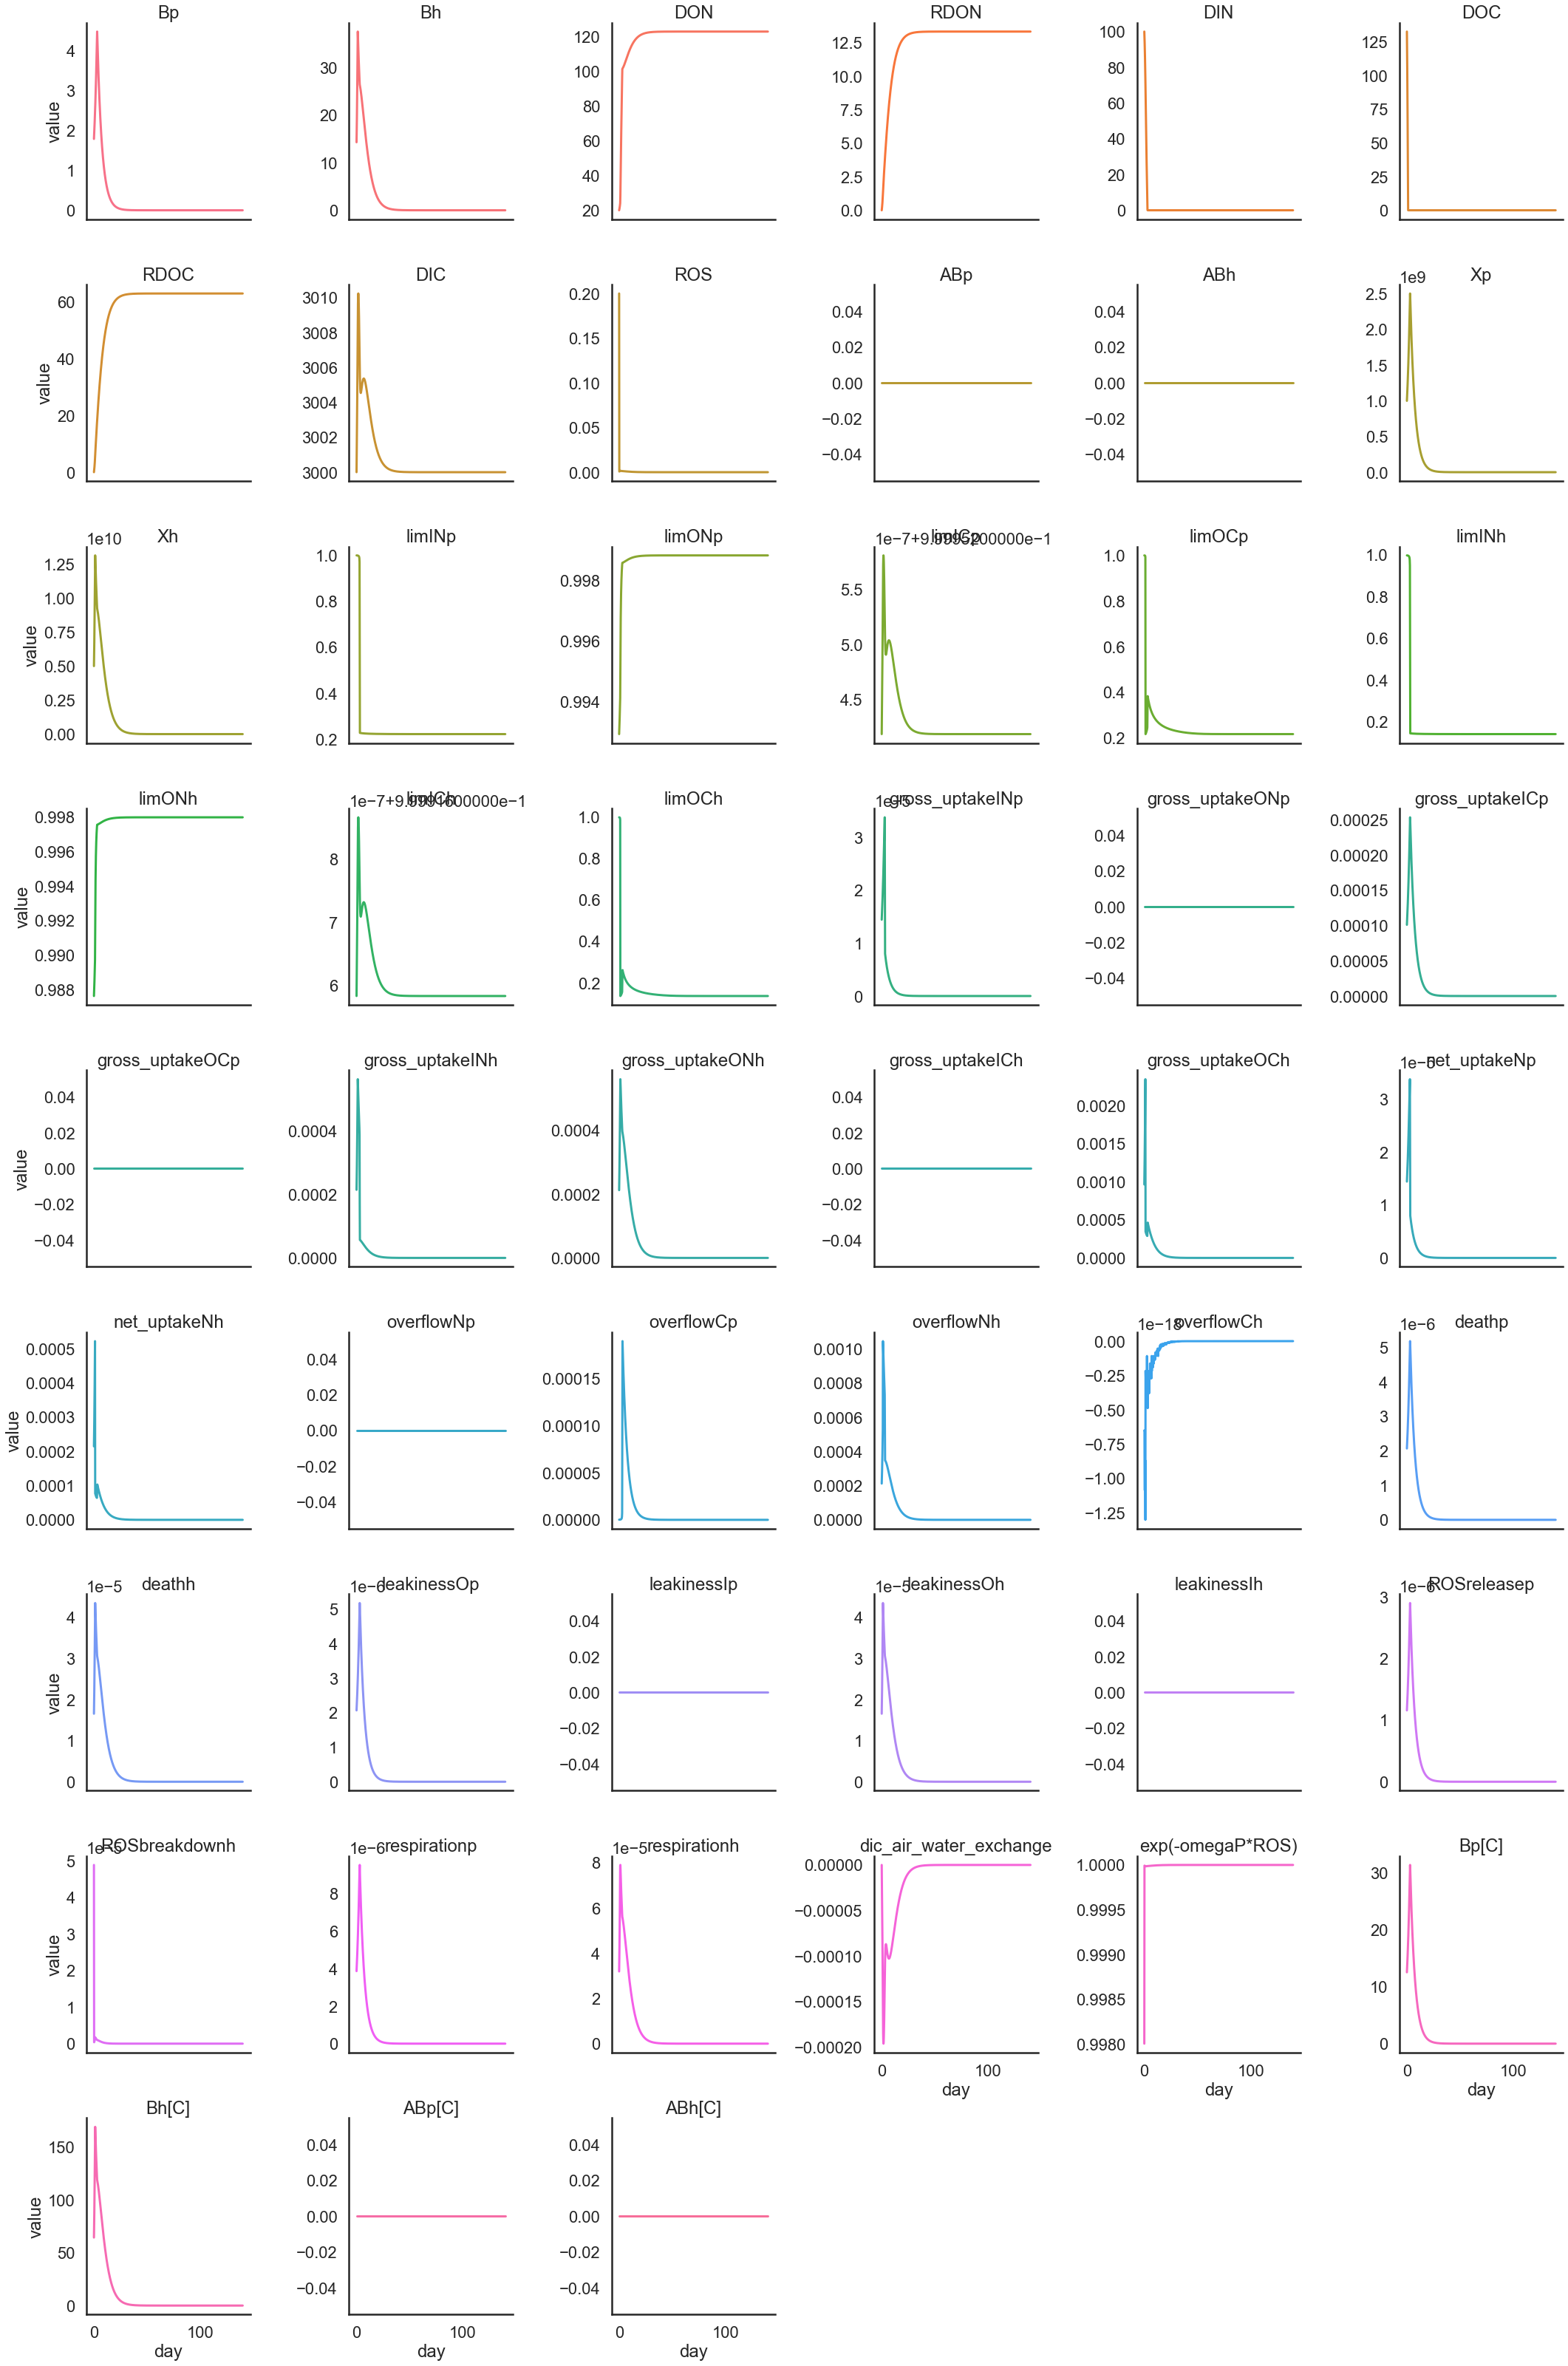

In [29]:
sns.relplot(data=mdf, x='day', y='value', hue='variable',
            kind='line', 
            col='variable', col_wrap=6, facet_kws=dict(sharey=False),
            legend=False,
           ).set_titles(row_template = '{row_name}', col_template = '{col_name}')

In [30]:
refdf.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'day', '1A3', 'cc 1A3', 'cc mit9312',
       'mit9312', 'cc Bh[N]', 'Bh[N]', 'cc Bp[N]', 'Bp[N]', 'cc Bh[C]',
       'Bh[C]', 'cc Bp[C]', 'Bp[C]', 't'],
      dtype='object')

<AxesSubplot:xlabel='day', ylabel='cells/l'>

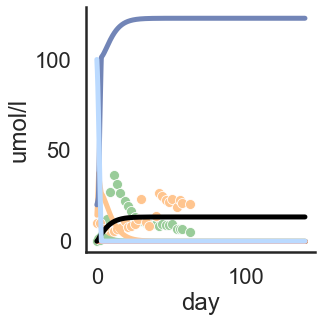

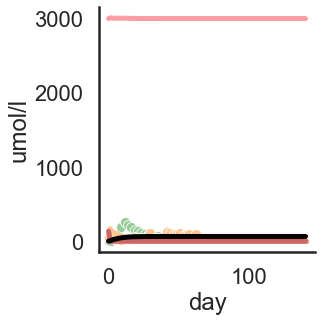

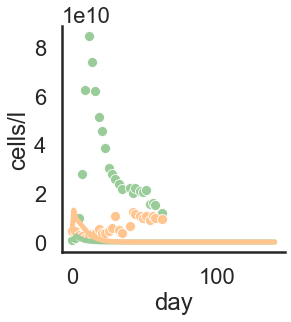

In [31]:
g = sns.relplot(data=mdf.loc[mdf.variable.isin(ccnorder)], 
            x='day', y='value', hue='variable',
            kind='line', 
            lw=5, legend=False,
            palette=ccnpalette, hue_order=ccnorder,
           ).set(ylabel='umol/l')
sns.scatterplot(data=refdf, x='day', y='cc Bp[N]', ax=g.ax, s=100, legend=False, color=PCOLOR)
sns.scatterplot(data=refdf, x='day', y='cc Bh[N]', ax=g.ax, s=100, legend=False, color=HCOLOR)

g = sns.relplot(data=mdf.loc[mdf.variable.isin(cccorder)], 
            x='day', y='value', hue='variable',
            kind='line', 
            lw=5, legend=False,
            palette=cccpalette, hue_order=cccorder,
           ).set(ylabel='umol/l')
sns.scatterplot(data=refdf, x='day', y='cc Bp[C]', ax=g.ax, s=100, legend=False, color=PCOLOR)
sns.scatterplot(data=refdf, x='day', y='cc Bh[C]', ax=g.ax, s=100, legend=False, color=HCOLOR)

g = sns.relplot(data=mdf.loc[mdf.variable.isin(['Xp', 'Xh'])], 
            x='day', y='value', hue='variable',
            kind='line', 
            lw=5, legend=False,
            palette=ccxpalette, hue_order=ccxorder,
           ).set(ylabel='cells/l')
sns.scatterplot(data=refdf, x='day', y='cc mit9312', ax=g.ax, s=100, legend=False, color=PCOLOR)
sns.scatterplot(data=refdf, x='day', y='cc 1A3', ax=g.ax, s=100, legend=False, color=HCOLOR)


In [32]:
df.columns

Index(['Bp', 'Bh', 'DON', 'RDON', 'DIN', 'DOC', 'RDOC', 'DIC', 'ROS', 'ABp',
       'ABh', 't', 'day', 'Xp', 'Xh', 'limINp', 'limONp', 'limICp', 'limOCp',
       'limINh', 'limONh', 'limICh', 'limOCh', 'gross_uptakeINp',
       'gross_uptakeONp', 'gross_uptakeICp', 'gross_uptakeOCp',
       'gross_uptakeINh', 'gross_uptakeONh', 'gross_uptakeICh',
       'gross_uptakeOCh', 'net_uptakeNp', 'net_uptakeNh', 'overflowNp',
       'overflowCp', 'overflowNh', 'overflowCh', 'deathp', 'deathh',
       'leakinessOp', 'leakinessIp', 'leakinessOh', 'leakinessIh',
       'ROSreleasep', 'ROSbreakdownh', 'respirationp', 'respirationh',
       'dic_air_water_exchange', 'exp(-omegaP*ROS)', 'Bp[C]', 'Bh[C]',
       'ABp[C]', 'ABh[C]'],
      dtype='object')

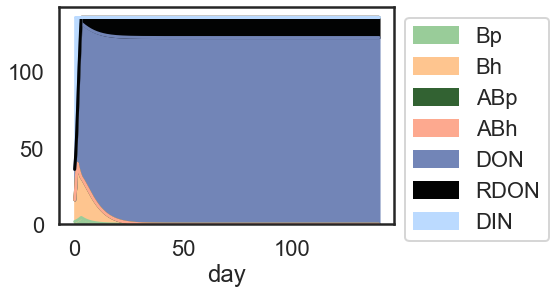

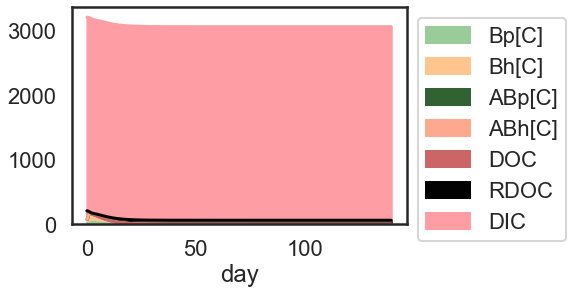

In [33]:
from matplotlib.colors import LinearSegmentedColormap
df[ccnorder+ ['day']].plot.area(x='day', 
                                colormap=LinearSegmentedColormap.from_list("", ccnpalette) 
                               )
plt.legend(bbox_to_anchor =(1,1))
plt.show()
df[cccorder+ ['day']].plot.area(x='day', 
                                colormap=LinearSegmentedColormap.from_list("", cccpalette) 
                               )
plt.legend(bbox_to_anchor =(1,1))
plt.show()


<AxesSubplot:xlabel='day', ylabel='cells/l'>

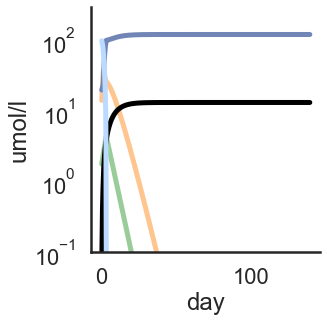

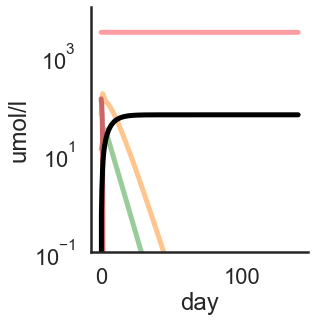

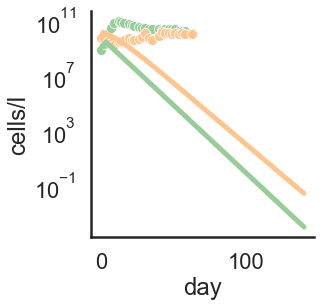

In [34]:
sns.relplot(data=mdf.loc[mdf.variable.isin(ccnorder)], 
            x='day', y='value', hue='variable',
            kind='line', 
            lw=5, legend=False,
            palette=ccnpalette, hue_order=ccnorder,
           ).set(ylabel='umol/l', yscale='log', ylim=(1e-1,3e2))

sns.relplot(data=mdf.loc[mdf.variable.isin(cccorder)], 
            x='day', y='value', hue='variable',
            kind='line', 
            lw=5, legend=False,
            palette=cccpalette, hue_order=cccorder,
           ).set(ylabel='umol/l', yscale='log', ylim=(1e-1,1e4))

g = sns.relplot(data=mdf.loc[mdf.variable.isin(['Xp', 'Xh'])], 
            x='day', y='value', hue='variable',
            kind='line', 
            lw=5, legend=False,
            palette=ccxpalette, hue_order=ccxorder,
           ).set(ylabel='cells/l', yscale='log')
sns.scatterplot(data=refdf, x='day', y='cc mit9312', ax=g.ax, s=100, legend=False, color=PCOLOR)
sns.scatterplot(data=refdf, x='day', y='cc 1A3', ax=g.ax, s=100, legend=False, color=HCOLOR)

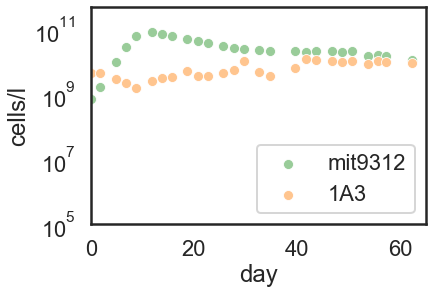

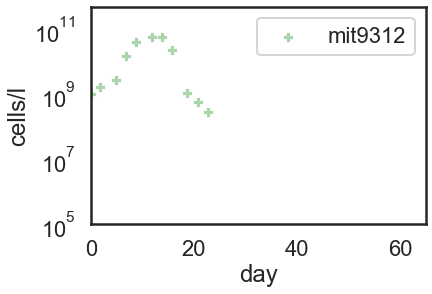

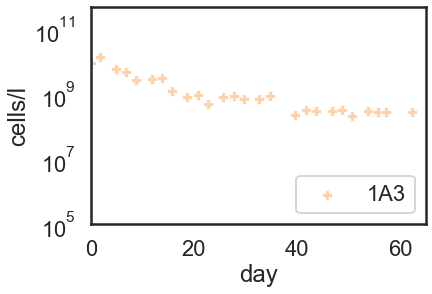

In [35]:
sns.scatterplot(data=refdf, x='day', y='cc mit9312', s=100, legend=False, color=PCOLOR, label='mit9312')
sns.scatterplot(data=refdf, x='day', y='cc 1A3',  s=100, legend=False,color=HCOLOR, label='1A3')
plt.legend(loc='lower right')
plt.ylabel('cells/l')
plt.yscale('log')
plt.ylim((1e5,5e11))
plt.xlim((0,65))

plt.show()
sns.scatterplot(data=refdf, x='day', y='mit9312', s=100, legend=False, color=PCOLOR_light, label='mit9312', marker='P')
plt.legend()
plt.ylabel('cells/l')
plt.yscale('log')
plt.ylim((1e5,5e11))
plt.xlim((0,65))
plt.show()
sns.scatterplot(data=refdf, x='day', y='1A3',  s=100, legend=False,color=HCOLOR_light, label='1A3', marker='P')
plt.legend(loc='lower right')
plt.ylabel('cells/l')
plt.yscale('log')
plt.ylim((1e5,5e11))
plt.xlim((0,65))
plt.show()


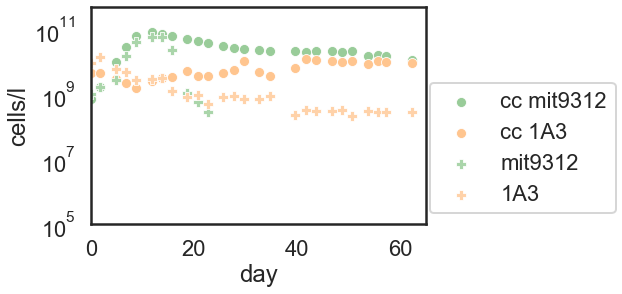

In [36]:
sns.scatterplot(data=refdf, x='day', y='cc mit9312', s=100, legend=False, color=PCOLOR, label='cc mit9312')
sns.scatterplot(data=refdf, x='day', y='cc 1A3',  s=100, legend=False,color=HCOLOR, label='cc 1A3')

sns.scatterplot(data=refdf, x='day', y='mit9312', s=100, legend=False, color=PCOLOR_light, label='mit9312', marker='P')
sns.scatterplot(data=refdf, x='day', y='1A3',  s=100, legend=False,color=HCOLOR_light, label='1A3', marker='P')
plt.legend(loc='lower right', bbox_to_anchor=(1.6,0))
plt.ylabel('cells/l')
plt.yscale('log')
plt.ylim((1e5,5e11))
plt.xlim((0,65))
plt.show()


In [37]:
len(param_vals)

In [38]:
df.min()

Bp                        1.745153e-13
Bh                        7.656077e-11
DON                       2.000000e+01
RDON                      0.000000e+00
DIN                       4.082112e-02
DOC                       3.949278e-02
RDOC                      0.000000e+00
DIC                       3.000000e+03
ROS                       3.113469e-15
ABp                       0.000000e+00
ABh                       0.000000e+00
t                         0.000000e+00
day                       0.000000e+00
Xp                        9.772859e-05
Xh                        2.679627e-02
limINp                    2.223713e-01
limONp                    9.929130e-01
limICp                    9.999524e-01
limOCp                    2.167033e-01
limINh                    1.402337e-01
limONh                    9.876410e-01
limICh                    9.999166e-01
limOCh                    1.362924e-01
gross_uptakeINp           3.144102e-19
gross_uptakeONp           0.000000e+00
gross_uptakeICp          

In [39]:
refdf.nsmallest(10, columns='cc mit9312')

,Unnamed: 0.1,Unnamed: 0,day,1A3,cc 1A3,cc mit9312,mit9312,cc Bh[N],Bh[N],cc Bp[N],Bp[N],cc Bh[C],Bh[C],cc Bp[C],Bp[C],t
0,0,0,0.000000,9.297512e+09,4.698967e+09,7.178947e+08,1.032630e+09,10.069216,19.923240,0.307669,0.442556,45.311472,89.654581,2.153684,3.097889,0.000000e+00
1,1,1,1.820833,1.469212e+10,4.648133e+09,1.753684e+09,1.641075e+09,9.960286,31.483118,0.751579,0.703318,44.821287,141.674030,5.261053,4.923225,1.573200e+05
2,2,2,4.832639,6.030062e+09,2.996029e+09,9.823158e+09,2.853167e+09,6.420061,12.921562,4.209925,1.222786,28.890276,58.147028,29.469474,8.559501,4.175400e+05
25,25,26,62.351389,2.848207e+08,9.505116e+09,1.186807e+10,NaN,20.368106,0.610330,5.086318,NaN,91.656478,2.746485,35.604224,NaN,5.387160e+06
24,24,25,57.351389,2.790659e+08,9.908372e+09,1.519633e+10,NaN,21.232226,0.597998,6.512713,NaN,95.545017,2.690992,45.588989,NaN,4.955160e+06
22,22,23,53.763889,3.145955e+08,8.856279e+09,1.556821e+10,NaN,18.977741,0.674133,6.672091,NaN,85.399834,3.033599,46.704640,NaN,4.645200e+06
23,23,24,55.800694,2.812344e+08,1.053628e+10,1.622576e+10,NaN,22.577741,0.602645,6.953898,NaN,101.599834,2.711903,48.677285,NaN,4.821180e+06
17,17,18,41.790972,3.356130e+08,1.238930e+10,1.996330e+10,NaN,26.548505,0.719171,8.555698,NaN,119.468272,3.236268,59.889889,NaN,3.610740e+06
20,20,21,48.746528,3.338616e+08,1.001302e+10,2.034765e+10,NaN,21.456478,0.715418,8.720419,NaN,96.554153,3.219379,61.042936,NaN,4.211700e+06
19,19,20,46.776389,3.010842e+08,1.052512e+10,2.113608e+10,NaN,22.553821,0.645181,9.058320,NaN,101.492193,2.903312,63.408241,NaN,4.041480e+06


In [40]:
refdf.head()

,Unnamed: 0.1,Unnamed: 0,day,1A3,cc 1A3,cc mit9312,mit9312,cc Bh[N],Bh[N],cc Bp[N],Bp[N],cc Bh[C],Bh[C],cc Bp[C],Bp[C],t
0,0,0,0.000000,9.297512e+09,4.698967e+09,7.178947e+08,1.032630e+09,10.069216,19.923240,0.307669,0.442556,45.311472,89.654581,2.153684,3.097889,0.000000
1,1,1,1.820833,1.469212e+10,4.648133e+09,1.753684e+09,1.641075e+09,9.960286,31.483118,0.751579,0.703318,44.821287,141.674030,5.261053,4.923225,157319.999971
2,2,2,4.832639,6.030062e+09,2.996029e+09,9.823158e+09,2.853167e+09,6.420061,12.921562,4.209925,1.222786,28.890276,58.147028,29.469474,8.559501,417540.000010
3,3,3,6.853472,4.987215e+09,2.290707e+09,2.812842e+10,1.576008e+10,4.908658,10.686889,12.055038,6.754319,22.088959,48.091001,84.385263,47.280230,592139.999981
4,4,4,8.779167,2.867312e+09,1.598094e+09,6.262316e+10,4.113340e+10,3.424487,6.144239,26.838496,17.628599,15.410189,27.649077,187.869474,123.400192,758520.000029


In [41]:
dir(sol)

['__add__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'count',
 'index']

In [42]:
sol.status

AttributeError: 'tuple' object has no attribute 'status'

In [ ]:
sol.nfev, sol.njev, sol.nlu

In [ ]:
sol.message

In [ ]:
refdf

In [ ]:
refdf.columns

In [ ]:
param_vals

In [ ]:
param_vals_neutral

In [ ]:
param_df = pd.DataFrame( [param_vals, param_vals_neutral], index=['val', 'neutral']).T
param_df['diff'] = param_df['val'] - param_df['neutral'] 

In [ ]:
param_df.loc[param_df['diff'] != 0.0]

In [ ]:
 0.7 * 1.9e-9 / Qp 

In [ ]:
2 * 1.9e-9 / Qh 